In [39]:
import copy

import numpy as np
import networkx as nx
import csv
import matplotlib.pyplot as plt
import copy
import pandas as pd

In [74]:
# Replace 'file.csv' with your file's path
df = pd.read_csv('restider.csv')

# Drop the first column by label and print the DataFrame to check
df = df.drop(df.columns[0], axis=1)

df = df.fillna(0)
# Convert the DataFrame to a NumPy array
data = df.to_numpy()

data += data.T


In [91]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    """
    rows, cols = np.where(adjacency_matrix != 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    """
    gr = nx.from_numpy_array(adjacency_matrix)
    pos = nx.spring_layout(gr, seed=34)
    nx.draw(gr, pos, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

{0: 'Emil + Hedda', 1: 'Ludwig', 2: 'Elliot', 3: 'David', 4: 'Erik', 5: 'Rohan', 6: 'Isak', 7: 'Oskar', 8: 'Adam'}
[[ 0. 24. 39. 12. 37. 40.  9. 20. 25.]
 [24.  0. 26. 21. 26. 30. 20.  7. 20.]
 [39. 26.  0. 33. 42.  9. 39. 26. 41.]
 [12. 21. 33.  0. 42. 34. 14. 18. 33.]
 [37. 26. 42. 42.  0. 45. 33. 25. 32.]
 [40. 30.  9. 34. 45.  0. 40. 27. 44.]
 [ 9. 20. 39. 14. 33. 40.  0. 15. 23.]
 [20.  7. 26. 18. 25. 27. 15.  0. 22.]
 [25. 20. 41. 33. 32. 44. 23. 22.  0.]]


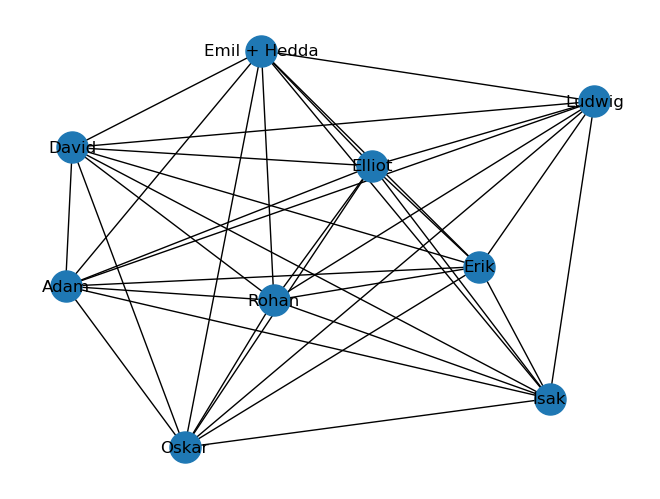

In [151]:
label_dict = dict()
names = list(df.columns)
for i in range(9):
    label_dict[i] = names[i]
    
print(label_dict)
print(data)
show_graph_with_labels(data,label_dict)


Elliot
Rohan
Emil + Hedda
Isak
David
Oskar
Ludwig
Adam
Erik


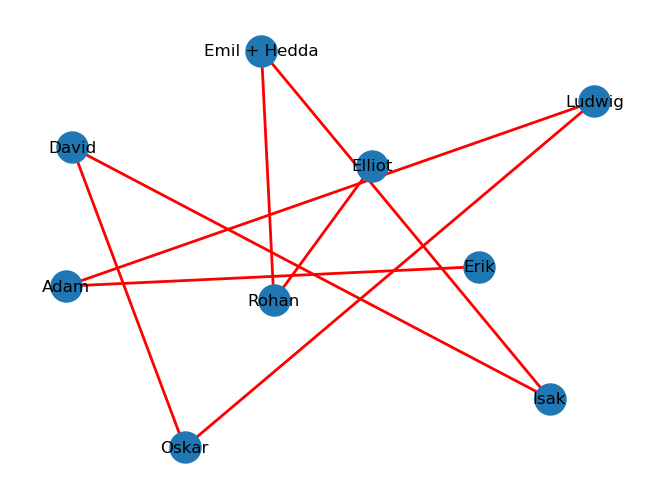

In [155]:
G = nx.from_numpy_array(data)
optimal_order = nx.algorithms.approximation.traveling_salesman_problem(G, method=nx.algorithms.approximation.greedy_tsp,cycle=False)


pos = nx.spring_layout(G, seed=34)
route_edges = [(optimal_order[i], optimal_order[i+1]) for i in range(len(optimal_order) - 1)]
nx.draw(G, pos, node_size=500, labels=label_dict, with_labels=True, edge_color="white")
nx.draw_networkx_edges(G, pos, edgelist=route_edges, edge_color='red', width=2)

for node in optimal_order:
    print(names[node])